# Montaño Molina Juan Jose

2. Construya un modelo de aprendizaje por refuerzo para resolver un rompecabezas de 4 filas por 5 columnas, de deja a su criterio la utilizacion de librerias o frameworks que desee.

In [33]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Definimos el tamaño del rompecabezas
ROWS = 4
COLS = 5

# Definimos las acciones posibles: 0: arriba, 1: abajo, 2: izquierda, 3: derecha
ACTIONS = [0, 1, 2, 3]

# Parámetros de aprendizaje
epsilon = 0.5
alpha = 0.1

# Inicializamos la tabla de acción-valor Q
Q = np.zeros((ROWS, COLS, len(ACTIONS)))

# Definimos una función para seleccionar una acción usando el método epsilon-greedy
def epsilon_greedy(state):
    if random.uniform(0, 1) < epsilon:
        return random.choice(ACTIONS)
    else:
        return np.argmax(Q[state[0], state[1]])

# Definimos una función para obtener el siguiente estado
def next_state(state, action):
    i, j = state
    if action == 0 and i > 0:
        i -= 1
    elif action == 1 and i < ROWS - 1:
        i += 1
    elif action == 2 and j > 0:
        j -= 1
    elif action == 3 and j < COLS - 1:
        j += 1
    return (i, j)

# Definimos una función para obtener la recompensa
def get_reward(state):
    if state == (ROWS - 1, COLS - 1):  # Estado objetivo
        return 100
    else:
        return -1

# Función para visualizar el tablero
def print_board(state):
    board = np.zeros((ROWS, COLS), dtype=int)
    board[state] = 1
    print(board)



In [34]:
# Entrenamos el agente
num_episodes = 1000
rewards_per_episode = []

for episode in range(num_episodes):
    # Inicializamos el estado
    state = (0, 0)
    total_reward = 0

    if episode == 0:
        print("Tablero al inicio del primer episodio:")
        print_board(state)

    while state != (ROWS - 1, COLS - 1):
        # Seleccionamos una acción
        action = epsilon_greedy(state)

        # Obtenemos el siguiente estado y la recompensa
        next_state_ = next_state(state, action)
        reward = get_reward(next_state_)

        # Actualizamos la tabla Q
        Q[state[0], state[1], action] += alpha * (reward + np.max(Q[next_state_[0], next_state_[1]]) - Q[state[0], state[1], action])

        # Actualizamos el estado
        state = next_state_

        # Acumulamos la recompensa
        total_reward += reward

    rewards_per_episode.append(total_reward)

    if episode == num_episodes - 1:
        print("Tablero al final del último episodio:")
        print_board(state)

# Calculamos la recompensa media cada 10 episodios
window_size = 10
rewards_mean = [np.mean(rewards_per_episode[i:i + window_size]) for i in range(0, num_episodes, window_size)]

Tablero al inicio del primer episodio:
[[1 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]
Tablero al final del último episodio:
[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 1]]


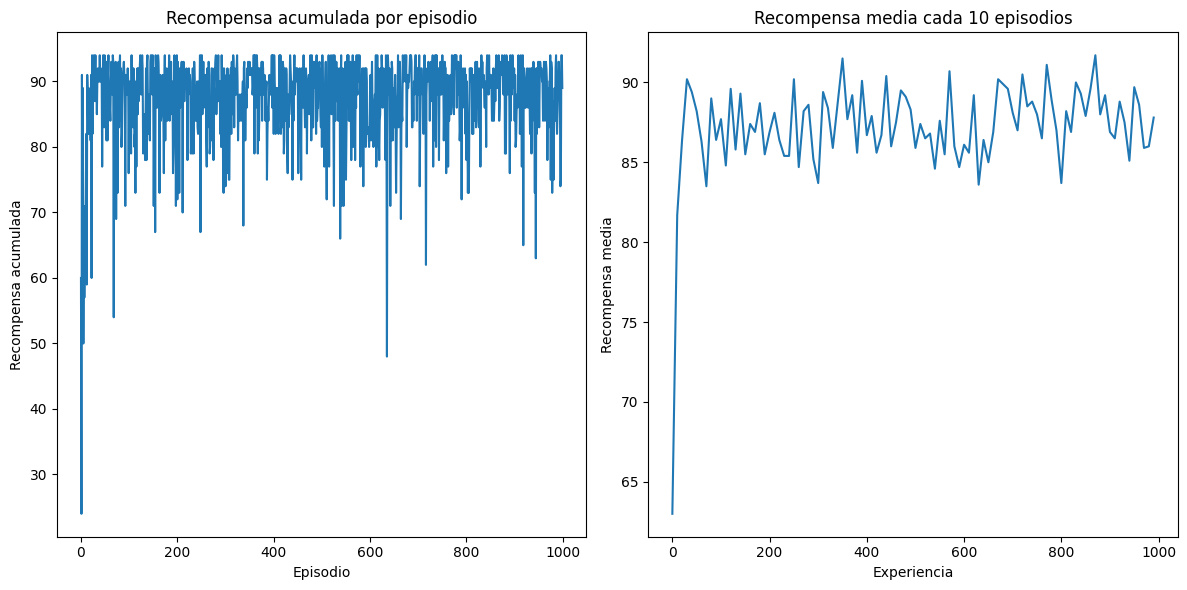

In [35]:
# Graficamos la recompensa acumulada por episodio
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(rewards_per_episode)
plt.xlabel('Episodio')
plt.ylabel('Recompensa acumulada')
plt.title('Recompensa acumulada por episodio')

# Graficamos la recompensa media cada 10 episodios
plt.subplot(1, 2, 2)
plt.plot(range(0, num_episodes, window_size), rewards_mean)
plt.xlabel('Experiencia')
plt.ylabel('Recompensa media')
plt.title('Recompensa media cada 10 episodios')

plt.tight_layout()
plt.show()

Explicación del código:El entorno es un rompecabezas de 4x5, y las acciones posibles son mover arriba, abajo, izquierda o derecha.
Inicialización de la tabla Q: La tabla Q se inicializa a cero.
Estrategia epsilon-greedy: Se selecciona una acción de manera aleatoria con una probabilidad
𝜖
ϵ y la mejor acción conocida con una probabilidad
1
−
𝜖
1−ϵ.
Función de transición y recompensa: Se define cómo el estado cambia con cada acción y cuál es la recompensa asociada.
Entrenamiento del agente: El agente se entrena durante un número de episodios, actualizando la tabla Q basado en las recompensas recibidas.
Este es un ejemplo básico y se puede mejorar y ajustar según las especificaciones del rompecabezas y las políticas de recompensa.